# K-Nearest Neighbour Model

# Diabetes Prediction

In [1]:
#pip install pandas
#pip install sklearn

SyntaxError: invalid syntax (3081752852.py, line 1)

Importing csv

In [5]:
import pandas as pd
df = pd.read_csv("diabetes.csv") #read diabetes.csv
df.shape

(768, 9)

**Check and Clean the data**

In [6]:
df. head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum().sum()

0

**Plotting the data**

In [83]:
df0 = df[df.Outcome==0]
df1 = df[df.Outcome==1]

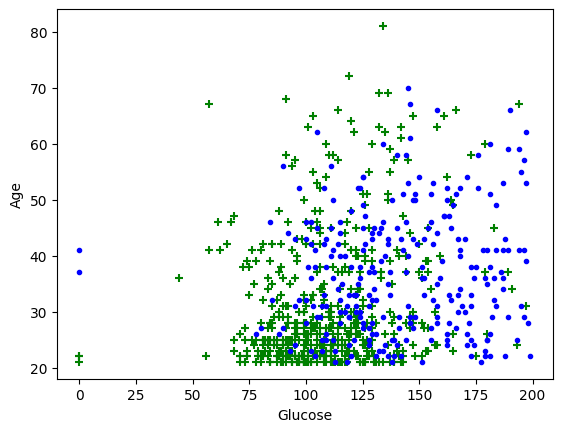

In [84]:
import matplotlib.pyplot as plt
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.scatter(df0['Glucose'], df0['Age'],color="green",marker='+')
plt.scatter(df1['Glucose'], df1['Age'],color="blue",marker='.')

**Split Train and Test Data**

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis='columns')
y = df.Outcome

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train, X_test: ", X_train.shape, X_test.shape)
print("Shape of y_train, y_test: ", y_train.shape, y_test.shape)

Shape of X_train, X_test:  (576, 8) (192, 8)
Shape of y_train, y_test:  (576,) (192,)


**Building The Model**

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)

In [88]:
knn.fit(X_train,y_train) #fitting the data
knn.score(X_test,y_test)

0.7395833333333334

**Plot Confusion Matrix**

In [87]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [68]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[104,  19],
       [ 31,  38]], dtype=int64)

**Compare test outputs with actual data**

Text(58.222222222222214, 0.5, 'Truth')

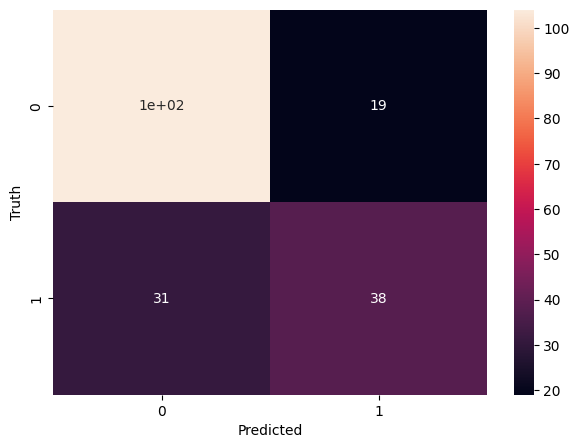

In [75]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')